In [1]:

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

from warnings import filterwarnings
filterwarnings('ignore')
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import plotly.express as px
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)


#To display the plots

from ipywidgets import interact
import plotly.io as pio

pio.renderers.default = "notebook"

In [3]:
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madcat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madcat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madcat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df = pd.read_json("deneme.json", lines=True)
df.head()

id      conversation_id  \
0  1565674777792102400  1565662890388033536   
1  1565674720267231232  1565674720267231232   
2  1565674680157077504  1565662890388033536   
3  1565674553908629504  1565674553908629504   
4  1565674530030452736  1565674530030452736   

                                 created_at       date      time  timezone  \
0  2022-09-02 15:15:30 Turkey Standard Time 2022-09-02  15:15:30       300   
1  2022-09-02 15:15:16 Turkey Standard Time 2022-09-02  15:15:16       300   
2  2022-09-02 15:15:07 Turkey Standard Time 2022-09-02  15:15:07       300   
3  2022-09-02 15:14:37 Turkey Standard Time 2022-09-02  15:14:37       300   
4  2022-09-02 15:14:31 Turkey Standard Time 2022-09-02  15:14:31       300   

               user_id         username                 name place  ... geo  \
0  1452305859556651016    ersin_sarigl2        Ersin Sarigül        ...       
1  1197131521703976961  cengizfatihzyu1  Cengiz Fatih Özyurt        ...       
2            730616797     busrakalkann         Büşra Kalkan        ...       
3  1300101659876560901     busraturun55          Büşra Turun        ...       
4           3372383553     defence_turk         DEFENCE TURK        ...       

  source user_rt_id user_rt retweet_id  \
0                                        
1                                        
2                                        
3                                        
4                                        

                                            reply_to  retweet_date  translate  \
0  [{'screen_name': 'teknofest', 'name': 'TEKNOFE...                            
1                                                 []                            
2  [{'screen_name': 'teknofest', 'name': 'TEKNOFE...                            
3                                                 []                            
4                                                 []                            

  trans_src trans_dest  
0                       
1                       
2                       
3                       
4                       

[5 rows x 36 columns]

In [5]:
df.drop_duplicates(["date","time","name","id","conversation_id"], inplace=True)

In [6]:
df.tweet

0        @teknofest Fasa fiso bom boş bir teknoloji fes...
1                                         TEKNOFEST 2022 🖤
2                                          @teknofest 🇹🇷❤️
3        #TEKNOFEST2022 @teknofest  https://t.co/HYktDa...
4        🛡️🇹🇷KIZILELMA, TEKNOFEST KARADENİZ ve SİPER | ...
                               ...                        
48978                                 @teknofest @C_Cakmak
50280    @bnntba @lknexus6 @CanerKara_Tayma Destek vere...
50400    Çok güzel.Emeği geçen herkesi tebrik ederim. B...
52331            @teknofest Hep yükseklerde hamd olsun. 🇹🇷
53720    @leylasahinusta @teknofest EŞİT AYRIMSIZ BİR G...
Name: tweet, Length: 16366, dtype: object

In [7]:
# **Word Tokenization and lowercase**
df["tweet"]=df["tweet"].apply(lambda x: word_tokenize(x.lower()))
#**Remove Punctuation and numbers and chars like "*" and "#"**
df["tweet"]=df["tweet"].apply(lambda x: list(i for i in x if i.isalpha()))
# **Remove Stopwords**
stop_words = stopwords.words('turkish')
df["tweet"]=df["tweet"].apply(lambda x: list(i for i in x if i not in stop_words))
# **lemmatization**
lem=WordNetLemmatizer()
df["tweet"]=df["tweet"].apply(lambda x: list(lem.lemmatize(i) for i in x))
# join
df["tweet"]=df["tweet"].apply(lambda x: " ".join(x))

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Most Used Words in Tweets

In [9]:
a = " ".join(df["tweet"])
a

'teknofest fasa fiso bom boş bir teknoloji festivali teknofest teknofest teknofest http teknofest ağ merkezli sohbetler bölüm http http teknofest türkiye teknofest geççek teknofest devamke http teknofest teknofest nice bomb plan http ymzzzcb ucbuzluviski teknofest kelime oyunları yapmayın herkes cumaya gidiyor yükümlülük peki cumanın farz bir ibadet olduğu gerçeğini değiştiriyor bunu yargılamak bize düşmez sırf konuyu buraya getirdiğiniz cevap verdim trtcocuk teknofest aslan teknofest sağlıkta yapay zeka yarışması biyoinformatik analiz kategorisinde belediyemizin sponsor olduğu vehbi dinçerler fen lisesi öğrencilerimiz orhan yağız çınar utku özmelioglu finaldeler başarılar http teknofest teknofest kelimetullâh teknofest bin ekip arasından finale kalan siber güvenlik uzmanı can cebeci ekibi geliştirdikleri as siber atölye siber alanda terörle mücadele etmeyi hedefliyorlar samsun samsunhaber http teknofest hayırlı cumalar ο σελτσούκ μπαϊρακτάρ πέταξε το αεροσκάφος τουρκικής κατασκεύης hü

In [10]:

words = a.split(" ")

counter = {}

for word in words:
    if word not in counter:
            counter[word] = 0
    counter[word] += 1


words_used = pd.Series(counter).sort_values(ascending=False)[:20]

words_used


teknofest             16917
http                  11951
samsun                 2839
bir                    2173
teknoloji              1421
bayraktar              1389
e                      1356
selcuk                 1142
teknofestkaradeniz     1066
ziyaret                 935
erdoğan                 913
karadeniz               900
selçuk                  884
büyük                   878
türkiye                 822
i                       820
rterdogan               705
te                      705
festivali               674
ilk                     648
dtype: int64

In [11]:
clean_words = pd.DataFrame(words_used.drop(["http","e","i","te"])[:20], columns=["count"])
clean_words

count
teknofest           16917
samsun               2839
bir                  2173
teknoloji            1421
bayraktar            1389
selcuk               1142
teknofestkaradeniz   1066
ziyaret               935
erdoğan               913
karadeniz             900
selçuk                884
büyük                 878
türkiye               822
rterdogan             705
festivali             674
ilk                   648

In [12]:

fig = px.treemap(clean_words, path=[clean_words.index],values='count', width=800, height=400,color="count")
fig.update_layout(margin = dict(t=.5, l=.5, r=.5, b=.5))
fig.show()

## Word Cloud

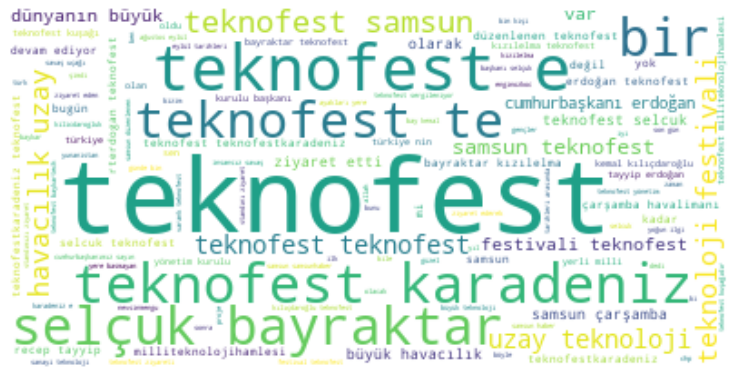

In [13]:
wordcloud = WordCloud(background_color="white", max_words=200)
wordcloud.generate(a)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# NGRAM 

In [14]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("(http) | (\w+:\/\/\S+)", "", txt).split())

In [15]:
tweets_no_urls = [remove_url(tweet) for tweet in df.tweet]

## TextBlob

In [16]:
a  = tweets_no_urls[0]
b  = TextBlob(a)
eng = b.translate(from_lang="tr",to="en")
print(eng)

Teknofest Fasa Fiso Bom An Empty Technology Festival


In [17]:
tweets_eng = []
for tweet in tweets_no_urls[:30]:
    try:
        blob1 = TextBlob(tweet)
        blob_eng = blob1.translate(from_lang="tr",to="en")
        tweets_eng.append(blob_eng)
    except:
        print("hata alıyorum")

In [18]:
tweets_eng[20].polarity,tweets_eng[20] 

(0.0, TextBlob("Teknofest remains incomplete without Haluk Rein."))

In [19]:
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in tweets_eng]

sentiment_values

[[-0.1, 'Teknofest Fasa Fiso Bom An Empty Technology Festival'],
 [0.0, 'Teknofest'],
 [0.0, 'Teknofest'],
 [0.0, 'Teknofest http'],
 [0.0, 'Teknofest Network -Centered Talks Episode Http'],
 [0.0, 'Teknofest Turkey'],
 [-0.3, 'Teknofest late'],
 [0.0, 'Teknofest Continuing Http'],
 [0.0, 'Teknofest'],
 [0.6, 'Teknofest Nice Bomb Plan Http'],
 [-0.16666666666666666,
  'ymzzzcb ucbuzluviski teknofest word games do not make everyone going to Friday Obligation So Cuma is a obligatory worship changes the fact that it is not up to us to judge this is not it is up to us that you have brought the subject here I replied.'],
 [0.0, 'TRTCOK CHILD TEKNOFEST LION'],
 [0.16,
  'TEKNOFEST HEALTH ARTICLE INTELLIGENCE COMPETITION Bioinformatics Analysis Category VEHBİ DİNÇERLER SCIENCE HIGH SCHOOL STUDENTS Orhan Yağız Çınar Utku Özmelioglu Finals Achievements'],
 [0.0, 'Teknofest'],
 [0.0, 'Teknofest Kelimetullâh'],
 [0.0,
  'Teknofest Thousand Teams The Cyber \u200b\u200bSecurity Specialist Can Cebec

In [20]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df

polarity                                              tweet
0  -0.100000  Teknofest Fasa Fiso Bom An Empty Technology Fe...
1   0.000000                                          Teknofest
2   0.000000                                          Teknofest
3   0.000000                                     Teknofest http
4   0.000000     Teknofest Network -Centered Talks Episode Http
5   0.000000                                   Teknofest Turkey
6  -0.300000                                     Teknofest late
7   0.000000                          Teknofest Continuing Http
8   0.000000                                          Teknofest
9   0.600000                      Teknofest Nice Bomb Plan Http
10 -0.166667  ymzzzcb ucbuzluviski teknofest word games do n...
11  0.000000                        TRTCOK CHILD TEKNOFEST LION
12  0.160000  TEKNOFEST HEALTH ARTICLE INTELLIGENCE COMPETIT...
13  0.000000                                          Teknofest
14  0.000000                             Teknofest Kelimetullâh
15  0.000000  Teknofest Thousand Teams The Cyber ​​Security ...
16  0.000000                                  Teknofest Fridays
17  0.000000  ο σελτσούκ μπαϊρακτάρ πέταξε το αεροσκάος τουρ...
18  0.000000  Teknofest Samsun finals AFADBASKANLİK Awarenes...
19  0.000000                                   Teknofest Selçuk
20  0.000000   Teknofest remains incomplete without Haluk Rein.
21  0.000000                                          Teknofest
22  0.000000                           Teknofest hahahha kingll
23  0.000000                                Teknofest MXKSNSKSD
24  0.375000                    aliogluhalim Teknofest original
25  0.000000                                          Teknofest
26  0.000000  TRTCOK CHILDREN TEKNOFEST LION WAITING THE TEK...
27  0.000000                                   Teknofest Turkey
28  0.000000                       Teknofest Sireneoznur Turkey
29  0.000000                       Teknofest Sireneoznur Turkey

## Bigram 

In [21]:
from nltk import bigrams
import networkx as nx

import itertools
import collections

In [22]:
# Create a sublist of lower case words for each tweet
words_in_tweet = [tweet.lower().split() for tweet in tweets_no_urls]

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('turkish'))

# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweet]

# Remove collection words
collection_words = ['teknofest']

tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madcat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]

# View bigrams for the first tweet
terms_bigram

[[('fasa', 'fiso'),
  ('fiso', 'bom'),
  ('bom', 'boş'),
  ('boş', 'bir'),
  ('bir', 'teknoloji'),
  ('teknoloji', 'festivali')],
 [],
 [],
 [],
 [('ağ', 'merkezli'),
  ('merkezli', 'sohbetler'),
  ('sohbetler', 'bölüm'),
  ('bölüm', 'http')],
 [],
 [],
 [('devamke', 'http')],
 [],
 [('nice', 'bomb'), ('bomb', 'plan'), ('plan', 'http')],
 [('ymzzzcb', 'ucbuzluviski'),
  ('ucbuzluviski', 'kelime'),
  ('kelime', 'oyunları'),
  ('oyunları', 'yapmayın'),
  ('yapmayın', 'herkes'),
  ('herkes', 'cumaya'),
  ('cumaya', 'gidiyor'),
  ('gidiyor', 'yükümlülük'),
  ('yükümlülük', 'peki'),
  ('peki', 'cumanın'),
  ('cumanın', 'farz'),
  ('farz', 'bir'),
  ('bir', 'ibadet'),
  ('ibadet', 'olduğu'),
  ('olduğu', 'gerçeğini'),
  ('gerçeğini', 'değiştiriyor'),
  ('değiştiriyor', 'bunu'),
  ('bunu', 'yargılamak'),
  ('yargılamak', 'bize'),
  ('bize', 'düşmez'),
  ('düşmez', 'sırf'),
  ('sırf', 'konuyu'),
  ('konuyu', 'buraya'),
  ('buraya', 'getirdiğiniz'),
  ('getirdiğiniz', 'cevap'),
  ('cevap', 'ver

In [24]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(50)

[(('selçuk', 'bayraktar'), 685),
 (('teknoloji', 'festivali'), 518),
 (('havacılık', 'uzay'), 489),
 (('uzay', 'teknoloji'), 442),
 (('teknofestkaradeniz', 'http'), 419),
 (('dünyanın', 'büyük'), 402),
 (('cumhurbaşkanı', 'erdoğan'), 389),
 (('ziyaret', 'etti'), 321),
 (('büyük', 'havacılık'), 314),
 (('samsun', 'çarşamba'), 305),
 (('milliteknolojihamlesi', 'http'), 301),
 (('i', 'ziyaret'), 291),
 (('samsun', 'http'), 251),
 (('devam', 'ediyor'), 245),
 (('bayraktar', 'kızılelma'), 239),
 (('çarşamba', 'havalimanı'), 226),
 (('recep', 'tayyip'), 206),
 (('kemal', 'kılıçdaroğlu'), 203),
 (('tayyip', 'erdoğan'), 189),
 (('yönetim', 'kurulu'), 187),
 (('yerli', 'milli'), 180),
 (('samsun', 'a'), 176),
 (('sergileniyor', 'http'), 175),
 (('kurulu', 'başkanı'), 174),
 (('türkiye', 'nin'), 171),
 (('etti', 'http'), 162),
 (('selcuk', 'http'), 153),
 (('ağustos', 'eylül'), 153),
 (('yoğun', 'ilgi'), 144),
 (('savaş', 'uçağı'), 144),
 (('cumhurbaşkanımız', 'sayın'), 139),
 (('büyük', 'teknol

In [25]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])

bigram_df

bigram  count
0             (selçuk, bayraktar)    685
1          (teknoloji, festivali)    518
2               (havacılık, uzay)    489
3               (uzay, teknoloji)    442
4      (teknofestkaradeniz, http)    419
5               (dünyanın, büyük)    402
6        (cumhurbaşkanı, erdoğan)    389
7                 (ziyaret, etti)    321
8              (büyük, havacılık)    314
9              (samsun, çarşamba)    305
10  (milliteknolojihamlesi, http)    301
11                   (i, ziyaret)    291
12                 (samsun, http)    251
13                (devam, ediyor)    245
14         (bayraktar, kızılelma)    239
15         (çarşamba, havalimanı)    226
16                (recep, tayyip)    206
17          (kemal, kılıçdaroğlu)    203
18              (tayyip, erdoğan)    189
19              (yönetim, kurulu)    187

In [26]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [27]:
d

[{('selçuk', 'bayraktar'): 685,
  ('teknoloji', 'festivali'): 518,
  ('havacılık', 'uzay'): 489,
  ('uzay', 'teknoloji'): 442,
  ('teknofestkaradeniz', 'http'): 419,
  ('dünyanın', 'büyük'): 402,
  ('cumhurbaşkanı', 'erdoğan'): 389,
  ('ziyaret', 'etti'): 321,
  ('büyük', 'havacılık'): 314,
  ('samsun', 'çarşamba'): 305,
  ('milliteknolojihamlesi', 'http'): 301,
  ('i', 'ziyaret'): 291,
  ('samsun', 'http'): 251,
  ('devam', 'ediyor'): 245,
  ('bayraktar', 'kızılelma'): 239,
  ('çarşamba', 'havalimanı'): 226,
  ('recep', 'tayyip'): 206,
  ('kemal', 'kılıçdaroğlu'): 203,
  ('tayyip', 'erdoğan'): 189,
  ('yönetim', 'kurulu'): 187}]

In [28]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

G.add_node("türkiye", weight=100)

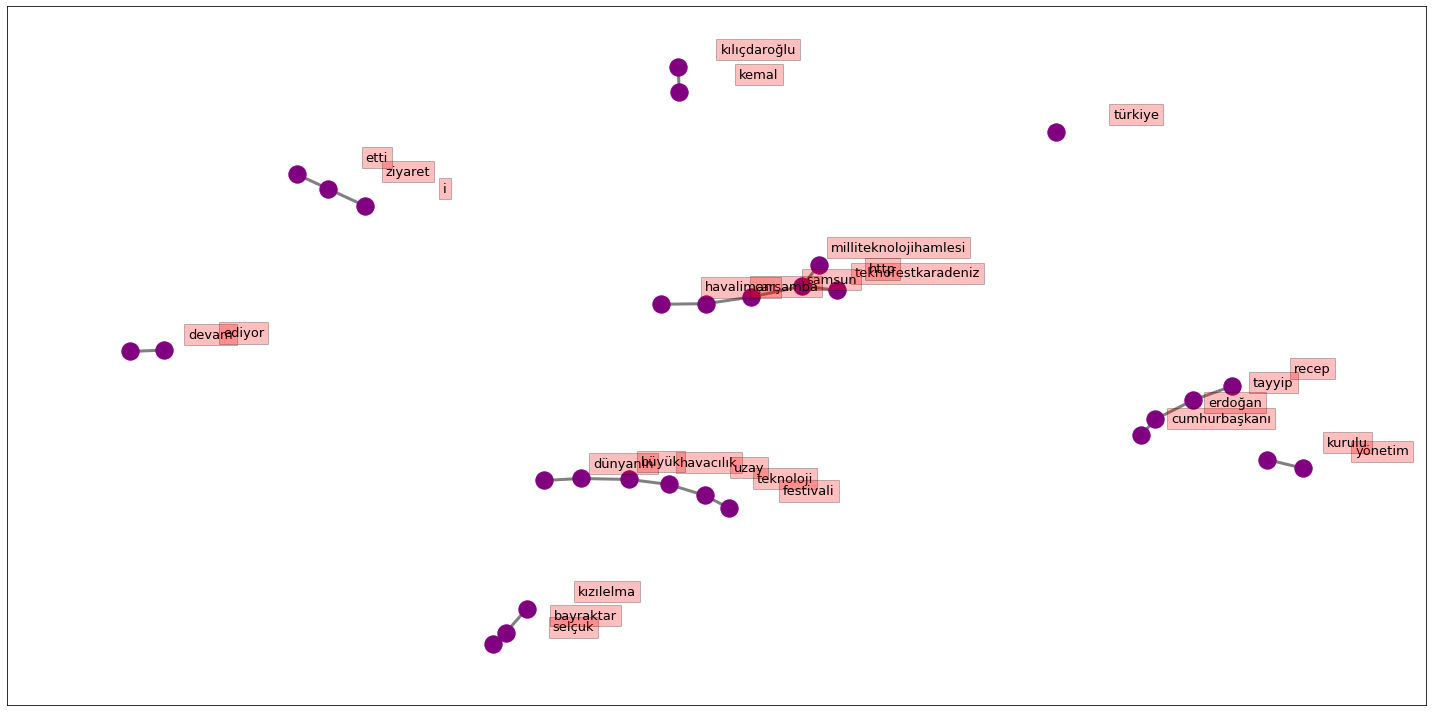

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
plt.tight_layout()    
plt.show()

# Transfer Learning

## Classification Of The Tweets

In [88]:
df1 = pd.read_json("sade_classv3.json") # this file prepared in colab with transformers
df1

id      conversation_id  \
0      1565674777792102400  1565662890388033536   
1      1565674720267231232  1565674720267231232   
2      1565674680157077504  1565662890388033536   
3      1565674553908629504  1565674553908629504   
4      1565674530030452736  1565674530030452736   
...                    ...                  ...   
48978  1565672597559320579  1565633501680082944   
50280  1565394111032688640  1565294726030528512   
50400  1565377864517783564  1565377864517783552   
52331  1565075970645794816  1564971541514838016   
53720  1564973906330533889  1564898323756191744   

                                     created_at       date      time  \
0      2022-09-02 15:15:30 Turkey Standard Time 2022-09-02  15:15:30   
1      2022-09-02 15:15:16 Turkey Standard Time 2022-09-02  15:15:16   
2      2022-09-02 15:15:07 Turkey Standard Time 2022-09-02  15:15:07   
3      2022-09-02 15:14:37 Turkey Standard Time 2022-09-02  15:14:37   
4      2022-09-02 15:14:31 Turkey Standard Time 2022-09-02  15:14:31   
...                                         ...        ...       ...   
48978  2022-09-02 15:06:50 Turkey Standard Time 2022-09-02  15:06:50   
50280  2022-09-01 20:40:14 Turkey Standard Time 2022-09-01  20:40:14   
50400  2022-09-01 19:35:40 Turkey Standard Time 2022-09-01  19:35:40   
52331  2022-08-31 23:36:03 Turkey Standard Time 2022-08-31  23:36:03   
53720  2022-08-31 16:50:29 Turkey Standard Time 2022-08-31  16:50:29   

       timezone              user_id         username                 name  \
0           300  1452305859556651016    ersin_sarigl2        Ersin Sarigül   
1           300  1197131521703976961  cengizfatihzyu1  Cengiz Fatih Özyurt   
2           300            730616797     busrakalkann         Büşra Kalkan   
3           300  1300101659876560901     busraturun55          Büşra Turun   
4           300           3372383553     defence_turk         DEFENCE TURK   
...         ...                  ...              ...                  ...   
48978       300  1203959317956833280     aliogluhalim              Halim61   
50280       300   808360543140638720         ad_borsa          TROL AVCISI   
50400       300  1240379852328513536      gokce190521              🍀Filiz💙   
52331       300  1222896385868959744     aysekilinc44          Ayşe Kılınç   
53720       300  1516696852460154886       ka62965006             Busra Kr   

      place  ... user_rt retweet_id  \
0            ...                      
1            ...                      
2            ...                      
3            ...                      
4            ...                      
...     ...  ...     ...        ...   
48978        ...                      
50280        ...                      
50400        ...                      
52331        ...                      
53720        ...                      

                                                reply_to retweet_date  \
0      [{'screen_name': 'teknofest', 'name': 'TEKNOFE...                
1                                                     []                
2      [{'screen_name': 'teknofest', 'name': 'TEKNOFE...                
3                                                     []                
4                                                     []                
...                                                  ...          ...   
48978  [{'screen_name': 'teknofest', 'name': 'TEKNOFE...                
50280  [{'screen_name': 'bnntba', 'name': 'BennTugba'...                
50400                                                 []                
52331  [{'screen_name': 'teknofest', 'name': 'TEKNOFE...                
53720  [{'screen_name': 'leylasahinusta', 'name': 'Dr...                

      translate  trans_src  trans_dest  \
0                                        
1                                        
2                                        
3                                        
4                                        
...        

In [89]:
twt_class = pd.DataFrame(df1.twt_class.apply(lambda x : x[0]["label"]).value_counts())
twt_class.columns = ["count"]
twt_class

count
technology  12109
politics     2080
culture       952
economy       922
sport         221
health         51
world          31

In [90]:
fig = px.treemap(twt_class,
                 #labels=labels, 
                 #parents= parents,
                 path=[twt_class.index],
                 values='count',
                 color="count",
                 width=900,
                 height=400,
                 title="Classification Of The Tweets")
fig.update_layout(margin=dict(t=30, l=.5, r=.5, b=.5))
fig.show()

## Sentiments of Tweets

In [91]:
sentiment = pd.DataFrame(df1.twt_sentiment.value_counts()).loc[["positive","negative"]]
sentiment

twt_sentiment
positive           1227
negative            382

In [92]:
fig = px.pie(sentiment,
             names= sentiment.index, 
             values= sentiment["twt_sentiment"],
             title= "Sentiment Ratio of Tweets'",
             width=600 
            )

fig.show()

In [93]:
df1.twt_harrasment.fillna("-",inplace=True) 

In [94]:
df1.twt_harrasment = [ np.nan if x == "-"  else  x[0]["label"] for x in df1.twt_harrasment]

In [95]:
harras = pd.DataFrame(df1.twt_harrasment.value_counts())
harras

twt_harrasment
Nötr                           1490
Kızdırma/Hakaret                105
Cinsiyetçi Zorbalık               7
Irkçılık                          7

In [102]:
fig = px.pie(harras,
             names= harras.index, 
             values= harras["twt_harrasment"],
             title= "Sentiment Ratio of Tweets'",
             width=600 
            )

fig.show()

In [100]:
df = pd.DataFrame(dict(
    r=harras["twt_harrasment"],
    theta= harras.index)
                 )
fig = px.line_polar(df, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()